<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [246]:
import numpy as np
import pandas as pd
from pandas import plotting as pd_plt

import warnings
warnings.simplefilter('ignore')
# import matplotlib as plt
%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [247]:
data = pd.read_csv('../../data/titanic_train.csv',
                  index_col='PassengerId')

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [248]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [249]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [250]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [251]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [252]:
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [253]:
age_categories = [age_category(age) for age in data.Age]

In [254]:
data['Age_category'] = age_categories

**Другой способ – через `apply`.**

In [255]:
data['Age_category'] = data['Age'].apply(age_category)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3


**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин <b>[+]</b>

In [256]:
def strSexToBool(strSex):
    if strSex == "male":
        return 0
    else:
        return 1
data_1 = data.rename(columns={"Sex": "female"}, inplace=False)
data_1["female"] = data_1["female"].apply(strSexToBool)
data_1.head()

,Survived,Pclass,Name,female,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,2


In [257]:
len(data_1[data_1['female'] == 1]), len(data_1[data_1['female'] == 0])

(314, 577)

**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108 <b>[+]</b>
- 112
- 125

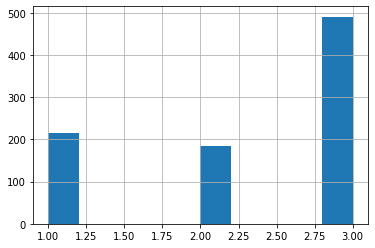

In [258]:
data.Pclass.hist()

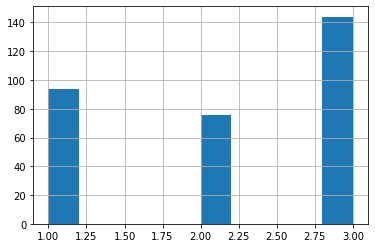

In [259]:
# Female
data_1[data_1["female"] == 1].Pclass.hist()

108


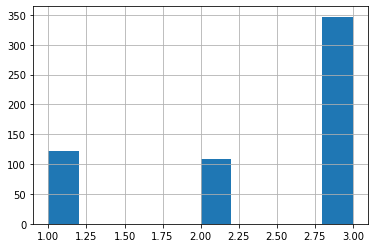

In [260]:
# Male
x = data_1[(data_1["female"] == 0) & (data_1["Pclass"] == 2)]
print(len(x))
data_1[data_1["female"] == 0].Pclass.hist()

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69 <b>[+]</b>
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [261]:
np.round([data["Fare"].median(), data["Fare"].std()], decimals=2)

array([14.45, 49.69])

**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [262]:
x = data[data.Age_category != 2].groupby(["Age_category", "Survived"]).size()
print(type(x))
print(x)
(x[1,1] * 100) / (x[1,0] + x[1,1]), (x[3,1] * 100) / (x[3,0] + x[3,1])

<class 'pandas.core.series.Series'>
Age_category  Survived
1             0           228
              1           156
3             0           154
              1            65
dtype: int64


(40.625, 29.680365296803654)

**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин <b>[+]</b>

In [263]:
x = data_1.groupby(["female", "Survived"]).size()
print(type(x))
print(x)
(x[0,1] * 100) / (x[0,0] + x[0,1]), (x[1,1] * 100) / (x[1,0] + x[1,1])

<class 'pandas.core.series.Series'>
female  Survived
0       0           468
        1           109
1       0            81
        1           233
dtype: int64


(18.890814558058924, 74.20382165605096)

**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William <b>[+]</b>
- John

In [264]:
def strSimplifyName(name):
    if name.find("Charles") > 0:
        return "Charles"
    elif name.find("Thomas") > 0:
        return "Thomas"
    elif name.find("William") > 0:
        return "William"
    elif name.find("John") > 0:
        return "John"
    else:
        return np.nan
    
male_data = data[data.Sex == "male"]
# # male_data[male_data.Name.str.contains("Charles")])
male_data.Name = male_data.Name.apply(strSimplifyName)
male_data.groupby(["Name"]).size() # automatically avoid NaN

Name
Charles    20
John       29
Thomas     14
William    46
dtype: int64

**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да <b>[+]</b>
- Нет

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f72b3d0>,
      dtype=object)

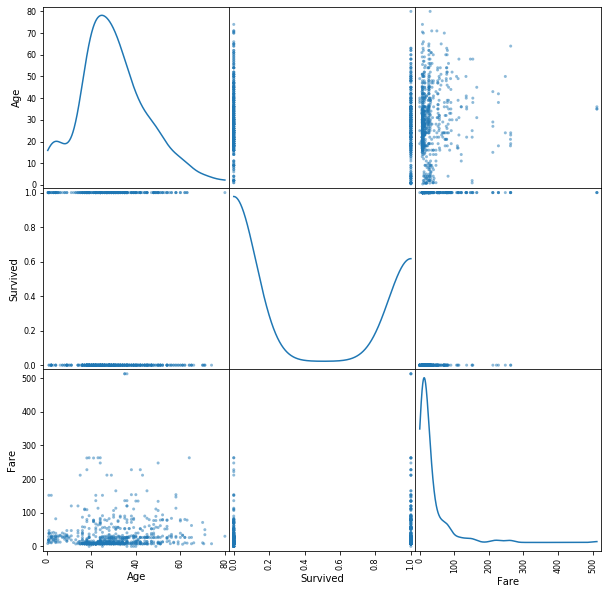

In [266]:
pd_plt.scatter_matrix(data[["Age", "Survived", "Fare"]], figsize=(10,10), diagonal="kde")

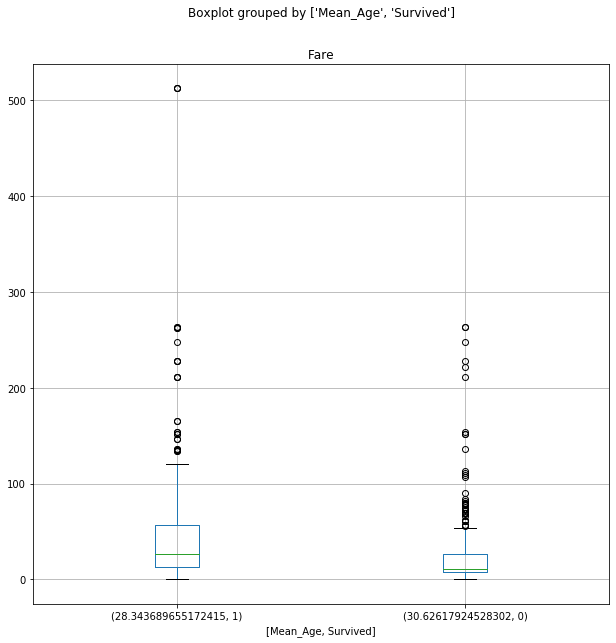

In [276]:
data_2 = data[["Age", "Survived", "Fare"]]
survivors_mean_age = data_2[data_2.Survived == True]["Age"].mean()
non_survivors_mean_age = data_2[data_2.Survived == False]["Age"].mean()
data_2["Mean_Age"] = 0
data_2.loc[data_2['Survived'] == True, 'Mean_Age'] = survivors_mean_age
data_2.loc[data_2['Survived'] == False, 'Mean_Age'] = non_survivors_mean_age
data_2
data_2.boxplot(column="Fare", by=["Mean_Age", "Survived"], figsize=(10,10))
# According box plot graph, if we are talking about statistically meaningful data (in 0 - 100 quartiles),
# mean age of survivors is less than mean age of non-survivors. And the price of ticket for
# non-survivors was for few times less than for survived ones.

In [287]:
data_3 = data[["Age", "Survived", "Fare"]]
data_3.groupby(["Survived"]).mean()
# Approved by numeric data

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет [+]
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса [+]
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса [+]

In [312]:
data_4 = data[["Age", "Pclass"]]
data_4["female"] = data.Sex.apply(lambda sex: 1 if sex == "female" else 0)
data_4.groupby(["Pclass", "female"]).mean()
# data_4.boxplot(column="Age_category", by=["Pclass", "female"], figsize=(10,10))

Age
Pclass female           
1      0       41.281386
       1       34.611765
2      0       30.740707
       1       28.722973
3      0       26.507589
       1       21.750000